# Library

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [196]:
missing_values = ["n/a", "na", "--", " ", "N/A", "NA","unknown"]

df = pd.read_csv('smartphones.csv', na_values=missing_values)
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [197]:
baris,kolom = df.shape
print('baris:', baris)
print('kolom:', kolom)

baris: 1020
kolom: 11


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [199]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [200]:
df.duplicated().sum()

0

In [201]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

# Preprocessing & Cleaning

In [202]:
# hapus fitur yang tidak perlu
df.drop(['card','price','model'], axis=1, inplace=True)

In [203]:
# hapus missing value
df.dropna(inplace=True)

In [204]:
df.sample(3)

,rating,sim,processor,ram,battery,display,camera,os
631,87.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC","Exynos 990, Octa Core, 2.73 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2400 px Display with Punch ...",64 MP + 12 MP + 12 MP Triple Rear & 10 MP Fron...,No FM Radio
566,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G , Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 65W Fast Charging,"6.43 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,No FM Radio
976,73.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Exynos 850, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",6000 mAh Battery with 15W Fast Charging,"6.5 inches, 720 x 1600 px, 90 Hz Display with ...",48 MP Quad Rear & 8 MP Front Camera,Android v11


In [205]:
# pecah kolom ram menjadi dua kolom yaitu ram dan rom
df[['ram','rom']] = df['ram'].str.extract(r'(\d+)\s*GB RAM, (\d+)\s*GB inbuilt')

In [206]:
df.head()

,rating,sim,processor,ram,battery,display,camera,os,rom
0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,256
1,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128
2,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,64
3,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128
4,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,128


In [207]:
# Memecah kolom battery menjadi battery_mah dan fast_charging
df['battery_mah(mAh)'] = df['battery'].str.extract('(\d+)').astype(float)
df['fast_charging(w)'] = df['battery'].str.extract('(\d+W|\d+W)').fillna(0)

# Menghapus huruf 'W' dari kolom fast_charging menggunakan regex
df['fast_charging(w)'] = df['fast_charging(w)'].str.replace('W', '')

In [208]:
df.head()

,rating,sim,processor,ram,battery,display,camera,os,rom,battery_mah(mAh),fast_charging(w)
0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,256,5000.0,100
1,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128,5000.0,33
2,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,64,5000.0,15
3,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,128,5000.0,NaN
4,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,128,5000.0,67


In [209]:
df['camera'] = df['camera'].str.extract('(\d+)').astype(float)

In [210]:
df.head()

,rating,sim,processor,ram,battery,display,camera,os,rom,battery_mah(mAh),fast_charging(w)
0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50.0,Android v13,256,5000.0,100
1,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64.0,Android v12,128,5000.0,33
2,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50.0,Android v13,64,5000.0,15
3,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50.0,Android v12,128,5000.0,NaN
4,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108.0,Android v13,128,5000.0,67


In [211]:
# Pecah kolom 'display' dan ambil inchi nya saja
df['display'] = df['display'].str.extract('(\d+\.\d+)').astype(float)

df.head()

,rating,sim,processor,ram,battery,display,camera,os,rom,battery_mah(mAh),fast_charging(w)
0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12,5000 mAh Battery with 100W Fast Charging,6.70,50.0,Android v13,256,5000.0,100
1,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with 33W Fast Charging,6.59,64.0,Android v12,128,5000.0,33
2,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4,5000 mAh Battery with 15W Fast Charging,6.60,50.0,Android v13,64,5000.0,15
3,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6,5000 mAh Battery with Fast Charging,6.55,50.0,Android v12,128,5000.0,NaN
4,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6,5000 mAh Battery with 67W Fast Charging,6.70,108.0,Android v13,128,5000.0,67


In [212]:
# cek missing value
df.isnull().sum()

rating                0
sim                   0
processor             0
ram                   6
battery               0
display              18
camera               21
os                    0
rom                   6
battery_mah(mAh)      0
fast_charging(w)    174
dtype: int64

In [213]:
# hapus missing value
df.dropna(inplace=True)

In [214]:
# cek missing value
df.isnull().sum()

rating              0
sim                 0
processor           0
ram                 0
battery             0
display             0
camera              0
os                  0
rom                 0
battery_mah(mAh)    0
fast_charging(w)    0
dtype: int64

In [215]:
# hapus kolom battery
df.drop(['battery'], axis=1, inplace=True)

In [216]:
# urutkan kolom supaya lebih mudah dibaca
df = df[['sim', 'processor','os', 'ram', 'rom', 'camera','display', 'battery_mah(mAh)', 'fast_charging(w)', 'rating']]

In [217]:
df.head()

,sim,processor,os,ram,rom,camera,display,battery_mah(mAh),fast_charging(w),rating
0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Android v13,12,256,50.0,6.70,5000.0,100,89.0
1,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",Android v12,6,128,64.0,6.59,5000.0,33,81.0
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",Android v13,4,64,50.0,6.60,5000.0,15,75.0
4,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",Android v13,6,128,108.0,6.70,5000.0,67,82.0
5,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor",Android v12,6,128,50.0,6.60,5000.0,25,80.0


In [218]:
# encoding kategori dengan scikit-learn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [219]:
df['sim'] = label.fit_transform(df['sim'])
df['processor'] = label.fit_transform(df['processor'])
df['os'] = label.fit_transform(df['os'])

In [220]:
df.head()

,sim,processor,os,ram,rom,camera,display,battery_mah(mAh),fast_charging(w),rating
0,6,171,5,12,256,50.0,6.70,5000.0,100,89.0
1,4,153,4,6,128,64.0,6.59,5000.0,33,81.0
2,4,52,5,4,64,50.0,6.60,5000.0,15,75.0
4,4,17,5,6,128,108.0,6.70,5000.0,67,82.0
5,6,121,4,6,128,50.0,6.60,5000.0,25,80.0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sim               690 non-null    int64  
 1   processor         690 non-null    int64  
 2   os                690 non-null    int64  
 3   ram               690 non-null    object 
 4   rom               690 non-null    object 
 5   camera            690 non-null    float64
 6   display           690 non-null    float64
 7   battery_mah(mAh)  690 non-null    float64
 8   fast_charging(w)  690 non-null    object 
 9   rating            690 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 59.3+ KB


In [222]:
# convert ram dan rom ke tipe data integer
df['ram'] = df['ram'].astype(int)
df['rom'] = df['rom'].astype(int)

# convert camera dan battery_mah(mAh)  ke tipe data integer
df['camera'] = df['camera'].astype(int)
df['battery_mah(mAh)'] = df['battery_mah(mAh)'].astype(int)

In [223]:
df.head()

,sim,processor,os,ram,rom,camera,display,battery_mah(mAh),fast_charging(w),rating
0,6,171,5,12,256,50,6.70,5000,100,89.0
1,4,153,4,6,128,64,6.59,5000,33,81.0
2,4,52,5,4,64,50,6.60,5000,15,75.0
4,4,17,5,6,128,108,6.70,5000,67,82.0
5,6,121,4,6,128,50,6.60,5000,25,80.0


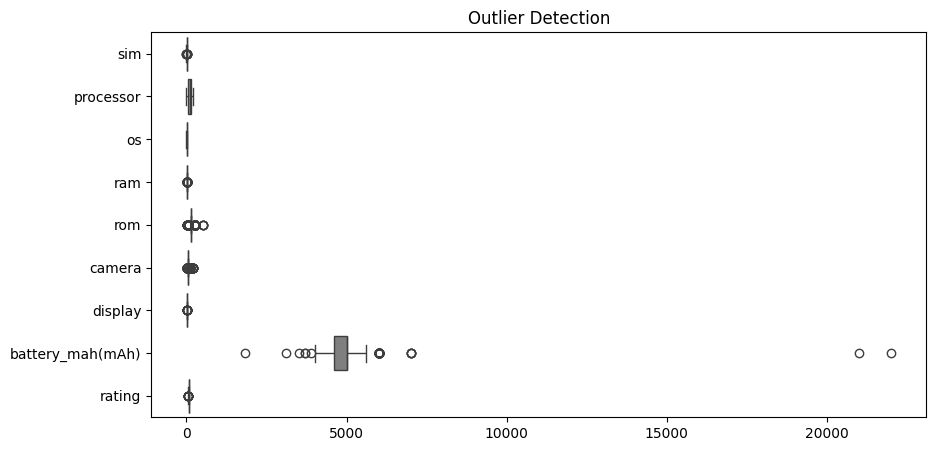

In [224]:
# cek outlier
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient='h')
plt.title('Outlier Detection')
plt.show()

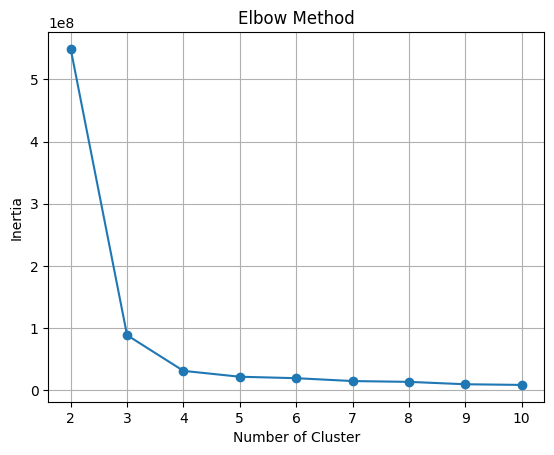

In [225]:
# # cek cluster yang optimal dengan elbow method dan silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# buat list inertia
inertia = []

# buat list silhouette
silhouette = []

# buat list jumlah cluster
n_cluster = list(range(2,11))

for i in n_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, kmeans.labels_))
    
# buat plot inertia
plt.plot(n_cluster, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [226]:
# implmentasi kmeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

df['cluster'] = y_kmeans
df.head(3)

,sim,processor,os,ram,rom,camera,display,battery_mah(mAh),fast_charging(w),rating,cluster
0,6,171,5,12,256,50,6.70,5000,100,89.0,1
1,4,153,4,6,128,64,6.59,5000,33,81.0,1
2,4,52,5,4,64,50,6.60,5000,15,75.0,1


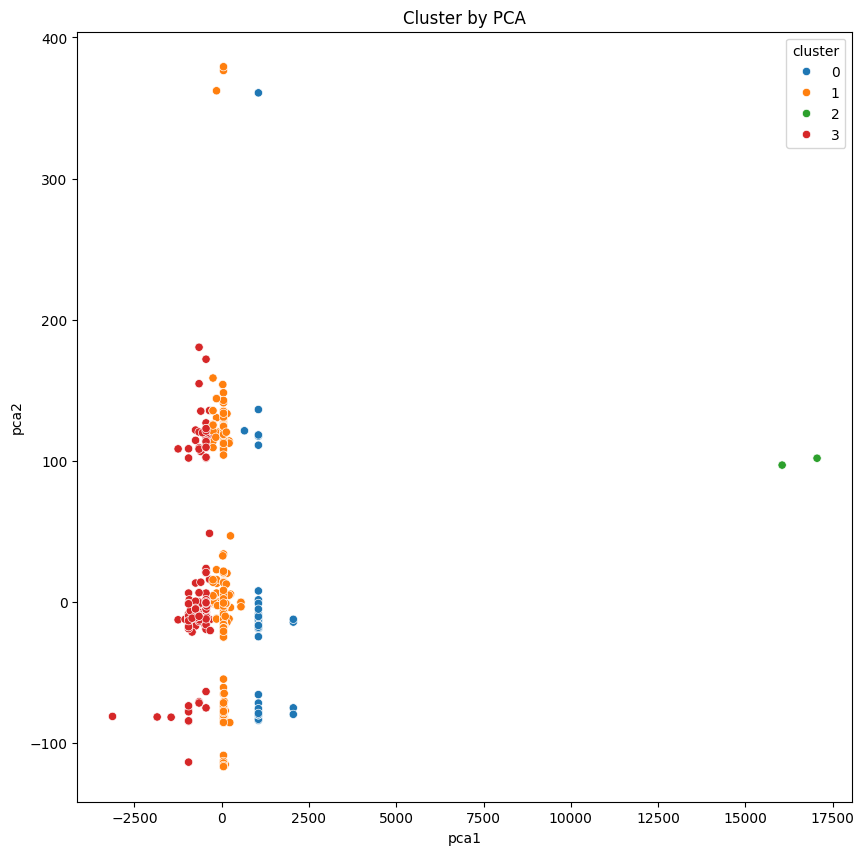

In [227]:
# gunakan PCA untuk mengurangi dimensi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(data=X_pca, columns=['pca1','pca2'])
df_pca['cluster'] = y_kmeans

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='cluster', palette='tab10')
centroids = kmeans.cluster_centers_
plt.title('Cluster by PCA')
plt.show()
